# The CSNY Social Network
#### How are David Crosby, Stephen Stills, Graham Nash, and Neil Young connected through their associated musical acts?

To vizualize this, I have created a simple .csv file with rows enumerating each performer and their entries in the *Associated Acts* section of their Wikipedia page.

**Sources**:
* [David Crosby - Wikipedia](https://en.wikipedia.org/wiki/David_Crosby)
* [Stephen Stills - Wikipedia](https://en.wikipedia.org/wiki/Stephen_Stills)
* [Graham Nash - Wikipedia](https://en.wikipedia.org/wiki/Graham_Nash)
* [Neil Young - Wikipedia](https://en.wikipedia.org/wiki/Neil_Young)
* DATA620 Teammate Claire Meyer for introduction to the NetworkX methods used here.

In [31]:
import csv
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

### Import Data

We're using `pandas` to import our .csv into a simple dataframe and view its structure.

In [9]:
df = pd.read_csv('CSNYedges.csv')
df.head()

,Performer,Associated Act
0,David Crosby,The Byrds
1,David Crosby,"Crosby, Stills, Nash, & Young"
2,David Crosby,Crosby & Nash
3,David Crosby,"Crosby, Stills, & Nash"
4,David Crosby,CPR


### Create and Draw NetworkX Graph

We use the NetworkX method `from_pandas_dataframe` to easily convert our dataframe to a NetworkX graph showing the relationships between the four performers and their associated musical acts.

In [29]:
csny_graph = nx.from_pandas_dataframe(df, source = 'Performer', target= 'Associated Act')

We also use a simple `for` loop to distinguish performers and associated acts by color in our vizualization.

In [18]:
colors = []
for node in csny_graph:
    if node in df['Performer'].values:
        colors.append('violet')
    else: colors.append('lightgreen')
        
#node colors `for` loop source: https://stackoverflow.com/a/59473049

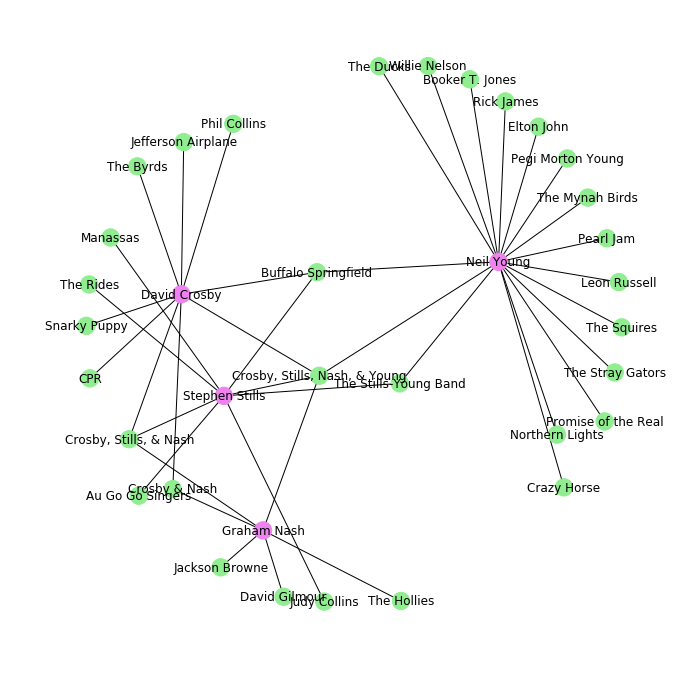

In [27]:
plt.figure(figsize= (9,9))
nx.draw(csny_graph, with_labels = True, node_color=colors, fontsize = 10)


### View Graph Info & Diameter

Finally, we look at some simple measures of the graph's size using `networkx.info` and `networkx.diameter`.  We can see that this social network has:

* 35 nodes
* 40 edges
* An average degree of 2.2857
* A diameter of 4

In [30]:
print(nx.info(csny_graph))

Name: 
Type: Graph
Number of nodes: 35
Number of edges: 40
Average degree:   2.2857


In [22]:
nx.diameter(csny_graph)

4